In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

In [13]:
def compute_metrics(original, enhanced):
    if len(original.shape) == 2:
        psnr_value = psnr(original, enhanced, data_range=original.max() - original.min())
        ssim_value = ssim(original, enhanced, data_range=original.max() - original.min())
    elif len(original.shape) == 3:
        channels_original = cv2.split(original)
        channels_enhanced = cv2.split(enhanced)
        psnr_values = [psnr(channels_original[i], channels_enhanced[i], data_range=original.max() - original.min()) for i in range(3)]
        ssim_values = [ssim(channels_original[i], channels_enhanced[i], data_range=original.max() - original.min()) for i in range(3)]
        psnr_value = np.mean(psnr_values)
        ssim_value = np.mean(ssim_values)
    else:
        raise ValueError("Unsupported image format")

    return psnr_value, ssim_value

In [14]:
def display_image_filters(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) / 255.0

    gaussian_kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16.0
    laplacian_kernel = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
    sobel_kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])


    smoothed_img = cv2.filter2D(img, -1, gaussian_kernel)
    sharpened_img = cv2.filter2D(img, -1, laplacian_kernel)
    edge_x_img = cv2.filter2D(img, -1, sobel_kernel_x)
    edge_y_img = cv2.filter2D(img, -1, sobel_kernel_y)

    psnr_smoothed, ssim_smoothed = compute_metrics(img, smoothed_img)
    psnr_sharpened, ssim_sharpened = compute_metrics(img, sharpened_img)
    psnr_edge_x, ssim_edge_x = compute_metrics(img, edge_x_img)
    psnr_edge_y, ssim_edge_y = compute_metrics(img, edge_y_img)


    plt.figure(figsize=(12, 8))

    plt.subplot(2, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.imshow(smoothed_img, cmap='gray')
    plt.title('Smoothed Image (Gaussian Filter):\nPSNR: {:.2f}, SSIM: {:.2f}'.format(psnr_smoothed, ssim_smoothed))
    plt.axis('off')

    plt.subplot(2, 3, 3)
    plt.imshow(sharpened_img, cmap='gray')
    plt.title('Sharpened Image (Laplacian Filter):\nPSNR: {:.2f}, SSIM: {:.2f}'.format(psnr_sharpened, ssim_sharpened))
    plt.axis('off')

    plt.subplot(2, 3, 4)
    plt.imshow(edge_x_img, cmap='gray')
    plt.title('Edge Detection (Sobel X):\nPSNR: {:.2f}, SSIM: {:.2f}'.format(psnr_edge_x, ssim_edge_x))
    plt.axis('off')

    plt.subplot(2, 3, 5)
    plt.imshow(edge_y_img, cmap='gray')
    plt.title('Edge Detection (Sobel Y):\nPSNR: {:.2f}, SSIM: {:.2f}'.format(psnr_edge_y, ssim_edge_y))
    plt.axis('off')

    plt.show()

In [15]:
Mypicture = './images/MyPicture.jpg'
RawXRay = './images/RawX-Ray.png'
sat = './images/satellite.jpg'

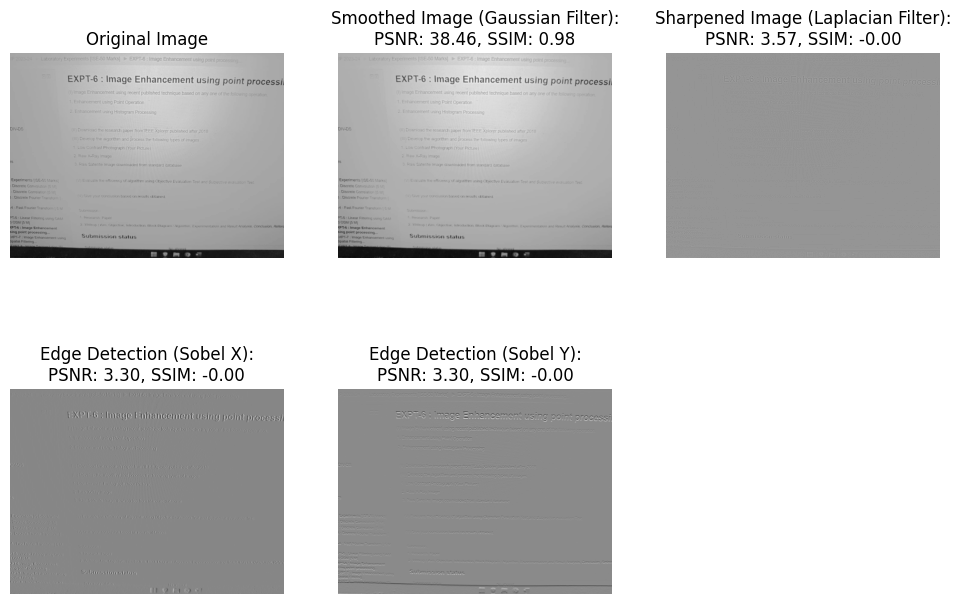

In [16]:
display_image_filters(Mypicture)

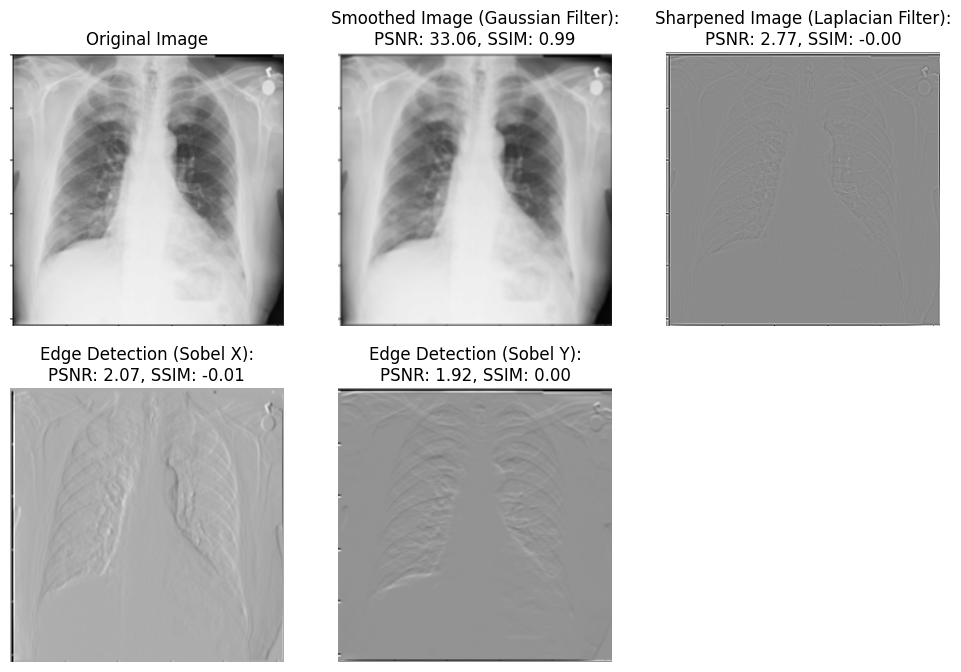

In [17]:
display_image_filters(RawXRay)

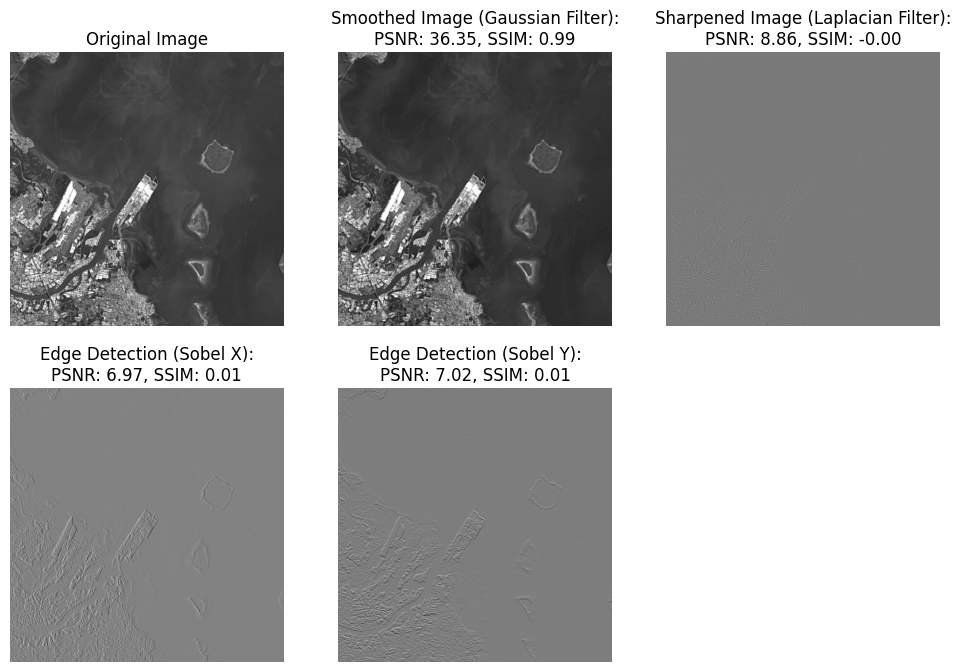

In [18]:
display_image_filters(sat)